### Kendall Andrews & Tanjanay Hardy
### 2/20/25
### CSE 482
### Project: Step 2



__Our sports statistics data is retrieved from nfl_data_py python package, which will be saved as multiple csv files and then uploaded into the php database.__

Information can be retrieved about the source of this data from https://rowzero.io/blog/nfl-data-py-in-a-spreadsheet-nfl-stats and https://github.com/nflverse/nfl_data_py

In [2]:
import pandas as pd

gamebyGame = pd.read_csv("gameByGame.csv")
playerSeason = pd.read_csv("playerSeason.csv")
playByPlay = pd.read_csv("playByPlayData.csv")
weeklyRosterData = pd.read_csv("weeklyRosterData.csv")
nextGenReceivingStats = pd.read_csv("nextGenReceivingStats.csv")
nextGenPassingStats = pd.read_csv("nextGenPassingStats.csv")
nextGenRushingStats = pd.read_csv("nextGenRushingStats.csv")
ftnData = pd.read_csv("ftnData.csv")
teamScores = pd.read_csv("nfl2024SeasonOutcome.csv") # manually created

/var/folders/zz/3b4b_cj17rgb4t357254xqqc0000gp/T/ipykernel_4312/1462945921.py:5: DtypeWarning: Columns (179,180,182,183,189,190,197,198,203,204,205,206,213,214,218,219,220,222,224,226,233,234,235,236,237,238,248,249,253,254,255,260,262,263,283,284) have mixed types. Specify dtype option on import or set low_memory=False.
  playByPlay = pd.read_csv("playByPlayData.csv")


Columns/features to consider so far: team, 'passing_yards', 'passing_tds', 'interceptions', wins, losses... almost all stats in gamaByGame table, but nothing else.


Join the teamScores table with gamebygame table so game outcomes are associated with each player in every game.

Delete all previews of other tables if need be.

In [3]:
teamScores.head()

,Team Name,team_abbr,week number,score,outcome
0,Arizona Cardinals,ARI,1,28,L
1,Arizona Cardinals,ARI,2,41,W
2,Arizona Cardinals,ARI,3,13,L
3,Arizona Cardinals,ARI,4,14,L
4,Arizona Cardinals,ARI,5,24,W


In [4]:
gamebyGame.head()

,player_id,player_name,player_display_name,position,position_group,headshot_url,recent_team,season,week,season_type,...,receiving_first_downs,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr
0,00-0023459,A.Rodgers,Aaron Rodgers,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,NYJ,2024,1,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,8.58,8.58
1,00-0023459,A.Rodgers,Aaron Rodgers,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,NYJ,2024,2,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,15.14,15.14
2,00-0023459,A.Rodgers,Aaron Rodgers,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,NYJ,2024,3,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,21.04,21.04
3,00-0023459,A.Rodgers,Aaron Rodgers,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,NYJ,2024,4,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,11.60,11.60
4,00-0023459,A.Rodgers,Aaron Rodgers,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,NYJ,2024,5,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,11.76,11.76


In [5]:
gamebyGame.shape

(5597, 53)

In [6]:
gamebyGame.columns

Index(['player_id', 'player_name', 'player_display_name', 'position',
       'position_group', 'headshot_url', 'recent_team', 'season', 'week',
       'season_type', 'opponent_team', 'completions', 'attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'dakota', 'carries', 'rushing_yards',
       'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost',
       'rushing_first_downs', 'rushing_epa', 'rushing_2pt_conversions',
       'receptions', 'targets', 'receiving_yards', 'receiving_tds',
       'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'receiving_2pt_conversions', 'racr', 'target_share', 'air_yards_share',
       'wopr', 'special_teams_tds', 'fantasy_points

Our 2 data frames of interest are joined by team abbreviation and the week number of the game:

In [7]:
teamScores.shape
teamScores

,Team Name,team_abbr,week number,score,outcome
0,Arizona Cardinals,ARI,1,28,L
1,Arizona Cardinals,ARI,2,41,W
2,Arizona Cardinals,ARI,3,13,L
3,Arizona Cardinals,ARI,4,14,L
4,Arizona Cardinals,ARI,5,24,W
...,...,...,...,...,...
539,Washington Commanders,WAS,13,42,W
540,Washington Commanders,WAS,15,20,W
541,Washington Commanders,WAS,16,36,W
542,Washington Commanders,WAS,17,30,W


In [8]:
# Standardize team names
gamebyGame["recent_team"] = gamebyGame["recent_team"].str.strip().str.upper()
teamScores["team_abbr"] = teamScores["team_abbr"].str.strip().str.upper()

# Standardize week numbers
gamebyGame["week"] = gamebyGame["week"].astype(int)
teamScores["week number"] = teamScores["week number"].astype(int)



In [9]:
# How many rows in gamebyGame have matching keys in teamScores?
merge_keys = teamScores[["team_abbr", "week number"]].drop_duplicates()
merge_keys.columns = ["recent_team", "week"]

# Merge just to test keys
matches = pd.merge(gamebyGame, merge_keys, on=["recent_team", "week"], how="inner")
print("✅ Matching rows found:", matches.shape[0])


✅ Matching rows found: 5340


In [10]:
merged_attempt = pd.merge(
    gamebyGame,
    teamScores,
    left_on=["recent_team", "week"],
    right_on=["team_abbr", "week number"],
    how="left",
    indicator=True
)

# Drop rows where 'week' is greater than 18
merged_attempt = merged_attempt[merged_attempt['week'] <= 18]

# See which didn't match
no_match = merged_attempt[merged_attempt["_merge"] == "left_only"]
#print("❌ Rows with no match:", no_match.shape[0])
#print("Unique unmatched team-week pairs:\n", no_match[["recent_team", "week"]].drop_duplicates().head(10))
#Remove weeks > 18
# Check the shape after filtering
print("✅ Shape after filtering weeks:", merged_attempt.shape)
print("❌ Rows with no match:", no_match.shape[0])
print("Unique unmatched team-week pairs:\n", no_match[["recent_team", "week"]].drop_duplicates().head(10))



✅ Shape after filtering weeks: (5340, 59)
❌ Rows with no match: 0
Unique unmatched team-week pairs:
 Empty DataFrame
Columns: [recent_team, week]
Index: []


In [11]:
merged_attempt

,player_id,player_name,player_display_name,position,position_group,headshot_url,recent_team,season,week,season_type,...,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr,Team Name,team_abbr,week number,score,outcome,_merge
0,00-0023459,A.Rodgers,Aaron Rodgers,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,NYJ,2024,1,REG,...,NaN,0.0,8.58,8.58,New York Jets,NYJ,1.0,19.0,L,both
1,00-0023459,A.Rodgers,Aaron Rodgers,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,NYJ,2024,2,REG,...,NaN,0.0,15.14,15.14,New York Jets,NYJ,2.0,24.0,W,both
2,00-0023459,A.Rodgers,Aaron Rodgers,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,NYJ,2024,3,REG,...,NaN,0.0,21.04,21.04,New York Jets,NYJ,3.0,24.0,W,both
3,00-0023459,A.Rodgers,Aaron Rodgers,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,NYJ,2024,4,REG,...,NaN,0.0,11.60,11.60,New York Jets,NYJ,4.0,9.0,L,both
4,00-0023459,A.Rodgers,Aaron Rodgers,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,NYJ,2024,5,REG,...,NaN,0.0,11.76,11.76,New York Jets,NYJ,5.0,17.0,L,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,ARI,2024,10,REG,...,0.074550,0.0,8.70,10.70,Arizona Cardinals,ARI,10.0,31.0,W,both
5593,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,ARI,2024,12,REG,...,NaN,0.0,1.80,1.80,Arizona Cardinals,ARI,12.0,6.0,L,both
5594,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,ARI,2024,13,REG,...,NaN,0.0,2.00,2.00,Arizona Cardinals,ARI,13.0,22.0,L,both
5595,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,ARI,2024,14,REG,...,0.017181,0.0,1.90,2.90,Arizona Cardinals,ARI,14.0,18.0,L,both


In [12]:
merged_attempt.to_csv('finalNFLtable1.csv', index=False) # to view in excel if desired

NaN values occur in columns 45, 47-50 due to the role of the player with some exceptions: Quarterback aka QB, meaning it is missing at random (MAR). NaN values also occur in columns 24, 26, and 27 for all players EXCEPT QBs with some exceptions, meaning it is missing at random (MAR). This is purposefully done so the data does not need to be further processed. Furthermore, all blanks in the data simply mean a lack of something occuring in a play that happened in a game, not that the statistic is unknown.

Kendall, please display that in your visualizations.

____

## Data Preprocessing
____

#### Missingness

In [13]:
merged_attempt

,player_id,player_name,player_display_name,position,position_group,headshot_url,recent_team,season,week,season_type,...,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr,Team Name,team_abbr,week number,score,outcome,_merge
0,00-0023459,A.Rodgers,Aaron Rodgers,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,NYJ,2024,1,REG,...,NaN,0.0,8.58,8.58,New York Jets,NYJ,1.0,19.0,L,both
1,00-0023459,A.Rodgers,Aaron Rodgers,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,NYJ,2024,2,REG,...,NaN,0.0,15.14,15.14,New York Jets,NYJ,2.0,24.0,W,both
2,00-0023459,A.Rodgers,Aaron Rodgers,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,NYJ,2024,3,REG,...,NaN,0.0,21.04,21.04,New York Jets,NYJ,3.0,24.0,W,both
3,00-0023459,A.Rodgers,Aaron Rodgers,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,NYJ,2024,4,REG,...,NaN,0.0,11.60,11.60,New York Jets,NYJ,4.0,9.0,L,both
4,00-0023459,A.Rodgers,Aaron Rodgers,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,NYJ,2024,5,REG,...,NaN,0.0,11.76,11.76,New York Jets,NYJ,5.0,17.0,L,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,ARI,2024,10,REG,...,0.074550,0.0,8.70,10.70,Arizona Cardinals,ARI,10.0,31.0,W,both
5593,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,ARI,2024,12,REG,...,NaN,0.0,1.80,1.80,Arizona Cardinals,ARI,12.0,6.0,L,both
5594,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,ARI,2024,13,REG,...,NaN,0.0,2.00,2.00,Arizona Cardinals,ARI,13.0,22.0,L,both
5595,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,ARI,2024,14,REG,...,0.017181,0.0,1.90,2.90,Arizona Cardinals,ARI,14.0,18.0,L,both


Text(0.5, 1.0, 'Heatmap of Missingness')

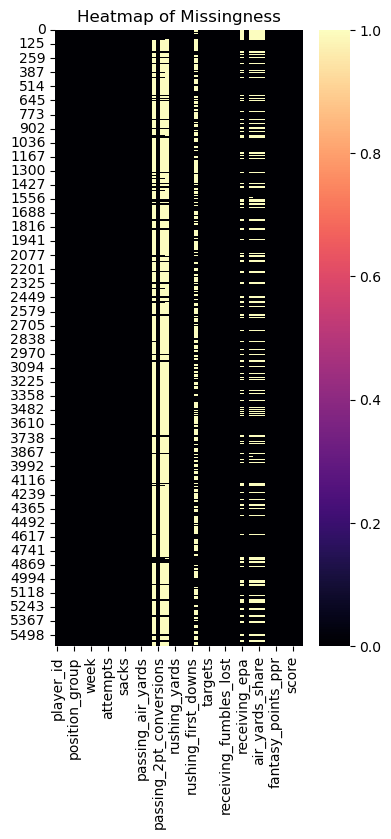

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#print(merged_df.isna().sum()) #4526 in passing 2pt conversions
plt.figure(figsize=(4,8))
sns.heatmap(merged_attempt.isna(), cmap="magma")
plt.title("Heatmap of Missingness")

In [15]:
print(merged_attempt.isna().sum())

player_id                         0
player_name                       0
player_display_name               0
position                          0
position_group                    0
headshot_url                      0
recent_team                       0
season                            0
week                              0
season_type                       0
opponent_team                     0
completions                       0
attempts                          0
passing_yards                     0
passing_tds                       0
interceptions                     0
sacks                             0
sack_yards                        0
sack_fumbles                      0
sack_fumbles_lost                 0
passing_air_yards                 0
passing_yards_after_catch         0
passing_first_downs               0
passing_epa                    4667
passing_2pt_conversions           0
pacr                           4678
dakota                         4760
carries                     

In [16]:
#Imputing
# Replace all missing values with 0
merged_attempt = merged_attempt.fillna(0)
# Verify the result
print("Missing values after replacing with 0:")
print(merged_attempt.isna().sum())

Missing values after replacing with 0:
player_id                      0
player_name                    0
player_display_name            0
position                       0
position_group                 0
headshot_url                   0
recent_team                    0
season                         0
week                           0
season_type                    0
opponent_team                  0
completions                    0
attempts                       0
passing_yards                  0
passing_tds                    0
interceptions                  0
sacks                          0
sack_yards                     0
sack_fumbles                   0
sack_fumbles_lost              0
passing_air_yards              0
passing_yards_after_catch      0
passing_first_downs            0
passing_epa                    0
passing_2pt_conversions        0
pacr                           0
dakota                         0
carries                        0
rushing_yards                  0
rush

In [17]:
merged_attempt

,player_id,player_name,player_display_name,position,position_group,headshot_url,recent_team,season,week,season_type,...,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr,Team Name,team_abbr,week number,score,outcome,_merge
0,00-0023459,A.Rodgers,Aaron Rodgers,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,NYJ,2024,1,REG,...,0.000000,0.0,8.58,8.58,New York Jets,NYJ,1.0,19.0,L,both
1,00-0023459,A.Rodgers,Aaron Rodgers,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,NYJ,2024,2,REG,...,0.000000,0.0,15.14,15.14,New York Jets,NYJ,2.0,24.0,W,both
2,00-0023459,A.Rodgers,Aaron Rodgers,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,NYJ,2024,3,REG,...,0.000000,0.0,21.04,21.04,New York Jets,NYJ,3.0,24.0,W,both
3,00-0023459,A.Rodgers,Aaron Rodgers,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,NYJ,2024,4,REG,...,0.000000,0.0,11.60,11.60,New York Jets,NYJ,4.0,9.0,L,both
4,00-0023459,A.Rodgers,Aaron Rodgers,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,NYJ,2024,5,REG,...,0.000000,0.0,11.76,11.76,New York Jets,NYJ,5.0,17.0,L,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,ARI,2024,10,REG,...,0.074550,0.0,8.70,10.70,Arizona Cardinals,ARI,10.0,31.0,W,both
5593,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,ARI,2024,12,REG,...,0.000000,0.0,1.80,1.80,Arizona Cardinals,ARI,12.0,6.0,L,both
5594,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,ARI,2024,13,REG,...,0.000000,0.0,2.00,2.00,Arizona Cardinals,ARI,13.0,22.0,L,both
5595,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,ARI,2024,14,REG,...,0.017181,0.0,1.90,2.90,Arizona Cardinals,ARI,14.0,18.0,L,both


Text(0.5, 1.0, 'Heatmap of Missingness')

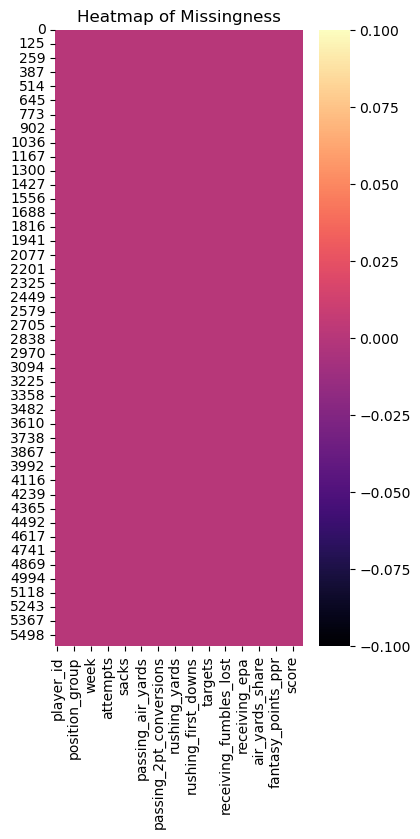

In [18]:
plt.figure(figsize=(4,8))
sns.heatmap(merged_attempt.isna(), cmap="magma")
plt.title("Heatmap of Missingness")

In [19]:
df_dtypes1 = gamebyGame.dtypes.reset_index()
df_dtypes1.columns = ["Column", "Data Type"]
df_dtypes1

,Column,Data Type
0,player_id,object
1,player_name,object
2,player_display_name,object
3,position,object
4,position_group,object
5,headshot_url,object
6,recent_team,object
7,season,int64
8,week,int64
9,season_type,object


In [20]:
#Identify duplicates
#print(merged_df.duplicated()) #No duplicates

#Correct data types
#print(len(merged_df.columns)) #58 columns/features
#merged_df.dtypes #objects = textual/categorical, int64/foat64 = numerical

df_dtypes = merged_attempt.dtypes.reset_index()
df_dtypes.columns = ["Column", "Data Type"]
df_dtypes


,Column,Data Type
0,player_id,object
1,player_name,object
2,player_display_name,object
3,position,object
4,position_group,object
5,headshot_url,object
6,recent_team,object
7,season,int64
8,week,int64
9,season_type,object



0.	player_id	- object/text/categorical - number that identifies the player 
1.	player_name	- object/text/categorical - name of the player
2.	player_display_name	- object/text/categorical - name of the player
3.	position	- object/text/categorical - position of player
4.	position_group	- object/text/categorical - position of player
5.	headshot_url	- object/text/categorical - picture of player
6.	recent_team	- object/text/categorical - team the player is on
7.	season	- int64 - the year the games occured in (2024)
8.	week	- int64 - the number identifying what week the game was played 
9.	season_type	- object/text/categorical -  indicating if the game belongs to regular or post season (REG)
10.	opponent_team	- object/text/categorical - name/abbr of the team they are playing against
11.	completions	- int64 - the amount of successful catches made from the quarterback's pass without the ball touching the ground
12.	attempts - int64 - the amount of tries the quartback made to make a completion/throw
13.	passing_yards - float64 - the total number of yards gained by a quarterback's forward passes during a football game or season
14.	passing_tds	- int64 -  if the play resulted in a passing TD.
15.	interceptions - float64 - if the pass was intercepted.
16.	sacks - float64 - when the quarterback is tackled behind the line of scrimmage before throwing a forward pass
17.	sack_yards - float64 - how many yards gained by the sack
18.	sack_fumbles - int64 - amount of fumbles that occured by a sack
19.	sack_fumbles_lost - int64 - number of times the quarterback loses possession of the football after fumbling the ball from a sack

**important for individual player stats: QB**

20.	passing_air_yards - float64 - total distance traveled by passes targeting that player, whether they caught it or not. 
21.	passing_yards_after_catch - float64 - the total number of yards gained by a quarterback's pass that was caught by a player
22.	passing_first_downs	- float64 - the team advanced the ball at least ten yards during a pass
23.	passing_epa	- float64 - a measure of success which defines the value of each play by the effect it has on the offense's likelihood to score during a pass
24.	passing_2pt_conversions	- int64 - the team that just scored must run a play from scrimmage close to the opponent's goal line and advance the ball across the goal line in the same manner as if it were scoring a touchdown during a pass
25.	pacr - float64 - Passing Air Conversion Ratio - PACR = passing_yards / passing_air_yards.
26.	dakota - float64 - ?
27.	carries	- int64 - a single rushing play

**important for individual player stats: Offense**

28.	rushing_yards - float64 - the total number of yards gained by a player or team when advancing the ball on the ground during a football game.
29.	rushing_tds	- int64 - a play where the runner carries the ball into the end zone without a forward pass being involved
30.	rushing_fumbles	- float64 - fumble done by the offense
31.	rushing_fumbles_lost - float64 - the yards lost from the offensive player that fumbled
32.	rushing_first_downs - float64 - a first down completed by the offense
33.	rushing_epa	- float64 - measures how well a team performs compared to their expectation on a play-by-play basis by the offense
34.	rushing_2pt_conversions	- int64 - 2pt conversions done by the offense
35.	receptions	- int64 -  part of a passing play in which a player in bounds successfully catches (receives) a forward pass thrown from their team's quarterback behind the line of scrimmage
36.	targets	- int64 - passes thrown by a quarterback in the direction of a specific receiver or tight end

**important for individual player stats: Receiver**

37.	receiving_yards	- float64 - the number of yards gained by a receiver on a passing play 
38.	receiving_tds	- int64 - the number of yards gained by a receiver from a touchdown
39.	receiving_fumbles - float64 - a fumble the moment a player gets possession of the ball
40.	receiving_fumbles_lost	- float64 - the yards lost when a fumble occurs the moment a player gets possession of the ball
41.	receiving_air_yards	float64 -  measure of how many yards the football travels in the air, from the line of scrimmage the moment a player gets possession of the ball
42.	receiving_yards_after_catch - float64 -  measure of how many yards football travels after the ball is caught by the receiver
43.	receiving_first_downs	- float64 - a first down completed after the ball is caught by the receiver
44.	receiving_epa	- float64 - measures how well a team performs compared to their expectation on a play-by-play basis by the receiver
45.	receiving_2pt_conversions	- int64 - 2pt conversions done by the receiver
46.	racr	- float64 - receiver air conversion ratio (RACR) = receiving yards / air yards

**important for calculations: Percentages**

47.	target_share	- float64 - Target share is a term used in NFL football to describe the number of targets that a player receives during a game or over the course of a season. 
48.	air_yards_share	- float64 -  the percentage of a team's total Air Yards that are attributed to a specific player
49.	wopr	- float64 - calculated by combining a player’s air yards share and target share - WOPR = 1.5 * Target Share + 0.7 * Air Yards Share
50.	special_teams_tds - float64 - a touchdown from special teams, players on the field during kickoff plays
51.	fantasy_points	- float64 - based on the performance of their starting players' performances in NFL games
52.	fantasy_points_ppr	- float64 - points per perception - a way to earn points in your fantasy football league.

**Data from teamScores**

53.	Team Name	- object/text/categorical - name of the football team
54.	team_abbr	- object/text/categorical - abbrevaition of the football team
55.	week number	int64 - the number identifying what week the game was played 
56.	score	int64 - the final score at the end of the game
57.	outcome	object/num  - whether the team won or lost the game - W/L - can be changed to binary using encoding (W=1, L=0)

#### Delete rows/features we don't need:

In [21]:
columns_to_drop = [
    "player_display_name" 
    "player_id",  # Maybe drop this
    "player_name",  # Already have player_display_name
    "position_group",  # Already have position
    "headshot_url",
    "season",  # All values are 2024
    "season_type",  # All values are REG
    "dakota",  # Unknown
    "targets",  # Already have target_share
    "fantasy_points",
    "fantasy_points_ppr",
    "Team Name",  # Needs to be joined in SQL
    "team_abbr",  # Needs to be joined in SQL
    "week number"  # Needs to be joined in SQL (already have week)
]

cleaned_df1 = merged_attempt.drop(columns=columns_to_drop, errors="ignore")
cleaned_df1

,player_id,player_display_name,position,recent_team,week,opponent_team,completions,attempts,passing_yards,passing_tds,...,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr,special_teams_tds,score,outcome,_merge
0,00-0023459,Aaron Rodgers,QB,NYJ,1,SF,13,21,167.0,1,...,0.000000,0,0.000,0.000000,0.000000,0.000000,0.0,19.0,L,both
1,00-0023459,Aaron Rodgers,QB,NYJ,2,TEN,18,30,176.0,2,...,0.000000,0,0.000,0.000000,0.000000,0.000000,0.0,24.0,W,both
2,00-0023459,Aaron Rodgers,QB,NYJ,3,NE,27,35,281.0,2,...,0.000000,0,0.000,0.000000,0.000000,0.000000,0.0,24.0,W,both
3,00-0023459,Aaron Rodgers,QB,NYJ,4,DEN,24,42,225.0,0,...,0.000000,0,0.000,0.000000,0.000000,0.000000,0.0,9.0,L,both
4,00-0023459,Aaron Rodgers,QB,NYJ,5,MIN,29,54,244.0,2,...,0.000000,0,0.000,0.000000,0.000000,0.000000,0.0,17.0,L,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,00-0039921,Trey Benson,RB,ARI,10,NYJ,0,0,0.0,0,...,1.987017,0,-3.125,0.083333,-0.072072,0.074550,0.0,31.0,W,both
5593,00-0039921,Trey Benson,RB,ARI,12,SEA,0,0,0.0,0,...,0.000000,0,0.000,0.000000,0.000000,0.000000,0.0,6.0,L,both
5594,00-0039921,Trey Benson,RB,ARI,13,MIN,0,0,0.0,0,...,0.000000,0,0.000,0.000000,0.000000,0.000000,0.0,22.0,L,both
5595,00-0039921,Trey Benson,RB,ARI,14,SEA,0,0,0.0,0,...,-0.144496,0,-0.800,0.026316,-0.031847,0.017181,0.0,18.0,L,both


#### Encoding

In [22]:
import sklearn
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
le = LabelEncoder()
print("BEFORE")
print(cleaned_df1['outcome'])
cleaned_df1['outcome']= le.fit_transform(cleaned_df1['outcome'])
print("AFTER")
print(cleaned_df1['outcome'])

BEFORE
0       L
1       W
2       W
3       L
4       L
       ..
5592    W
5593    L
5594    L
5595    L
5596    W
Name: outcome, Length: 5340, dtype: object
AFTER
0       0
1       1
2       1
3       0
4       0
       ..
5592    1
5593    0
5594    0
5595    0
5596    1
Name: outcome, Length: 5340, dtype: int64


#### Scaling and PCA

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np

X = cleaned_df1.drop(columns=['outcome'])  #target column name
X = X.select_dtypes(include=[np.number]) #drop non numeric features
y = cleaned_df1['outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to scaled data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Optional: check explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.27090353 0.13212449]


____

## Visualizations
____

##### Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

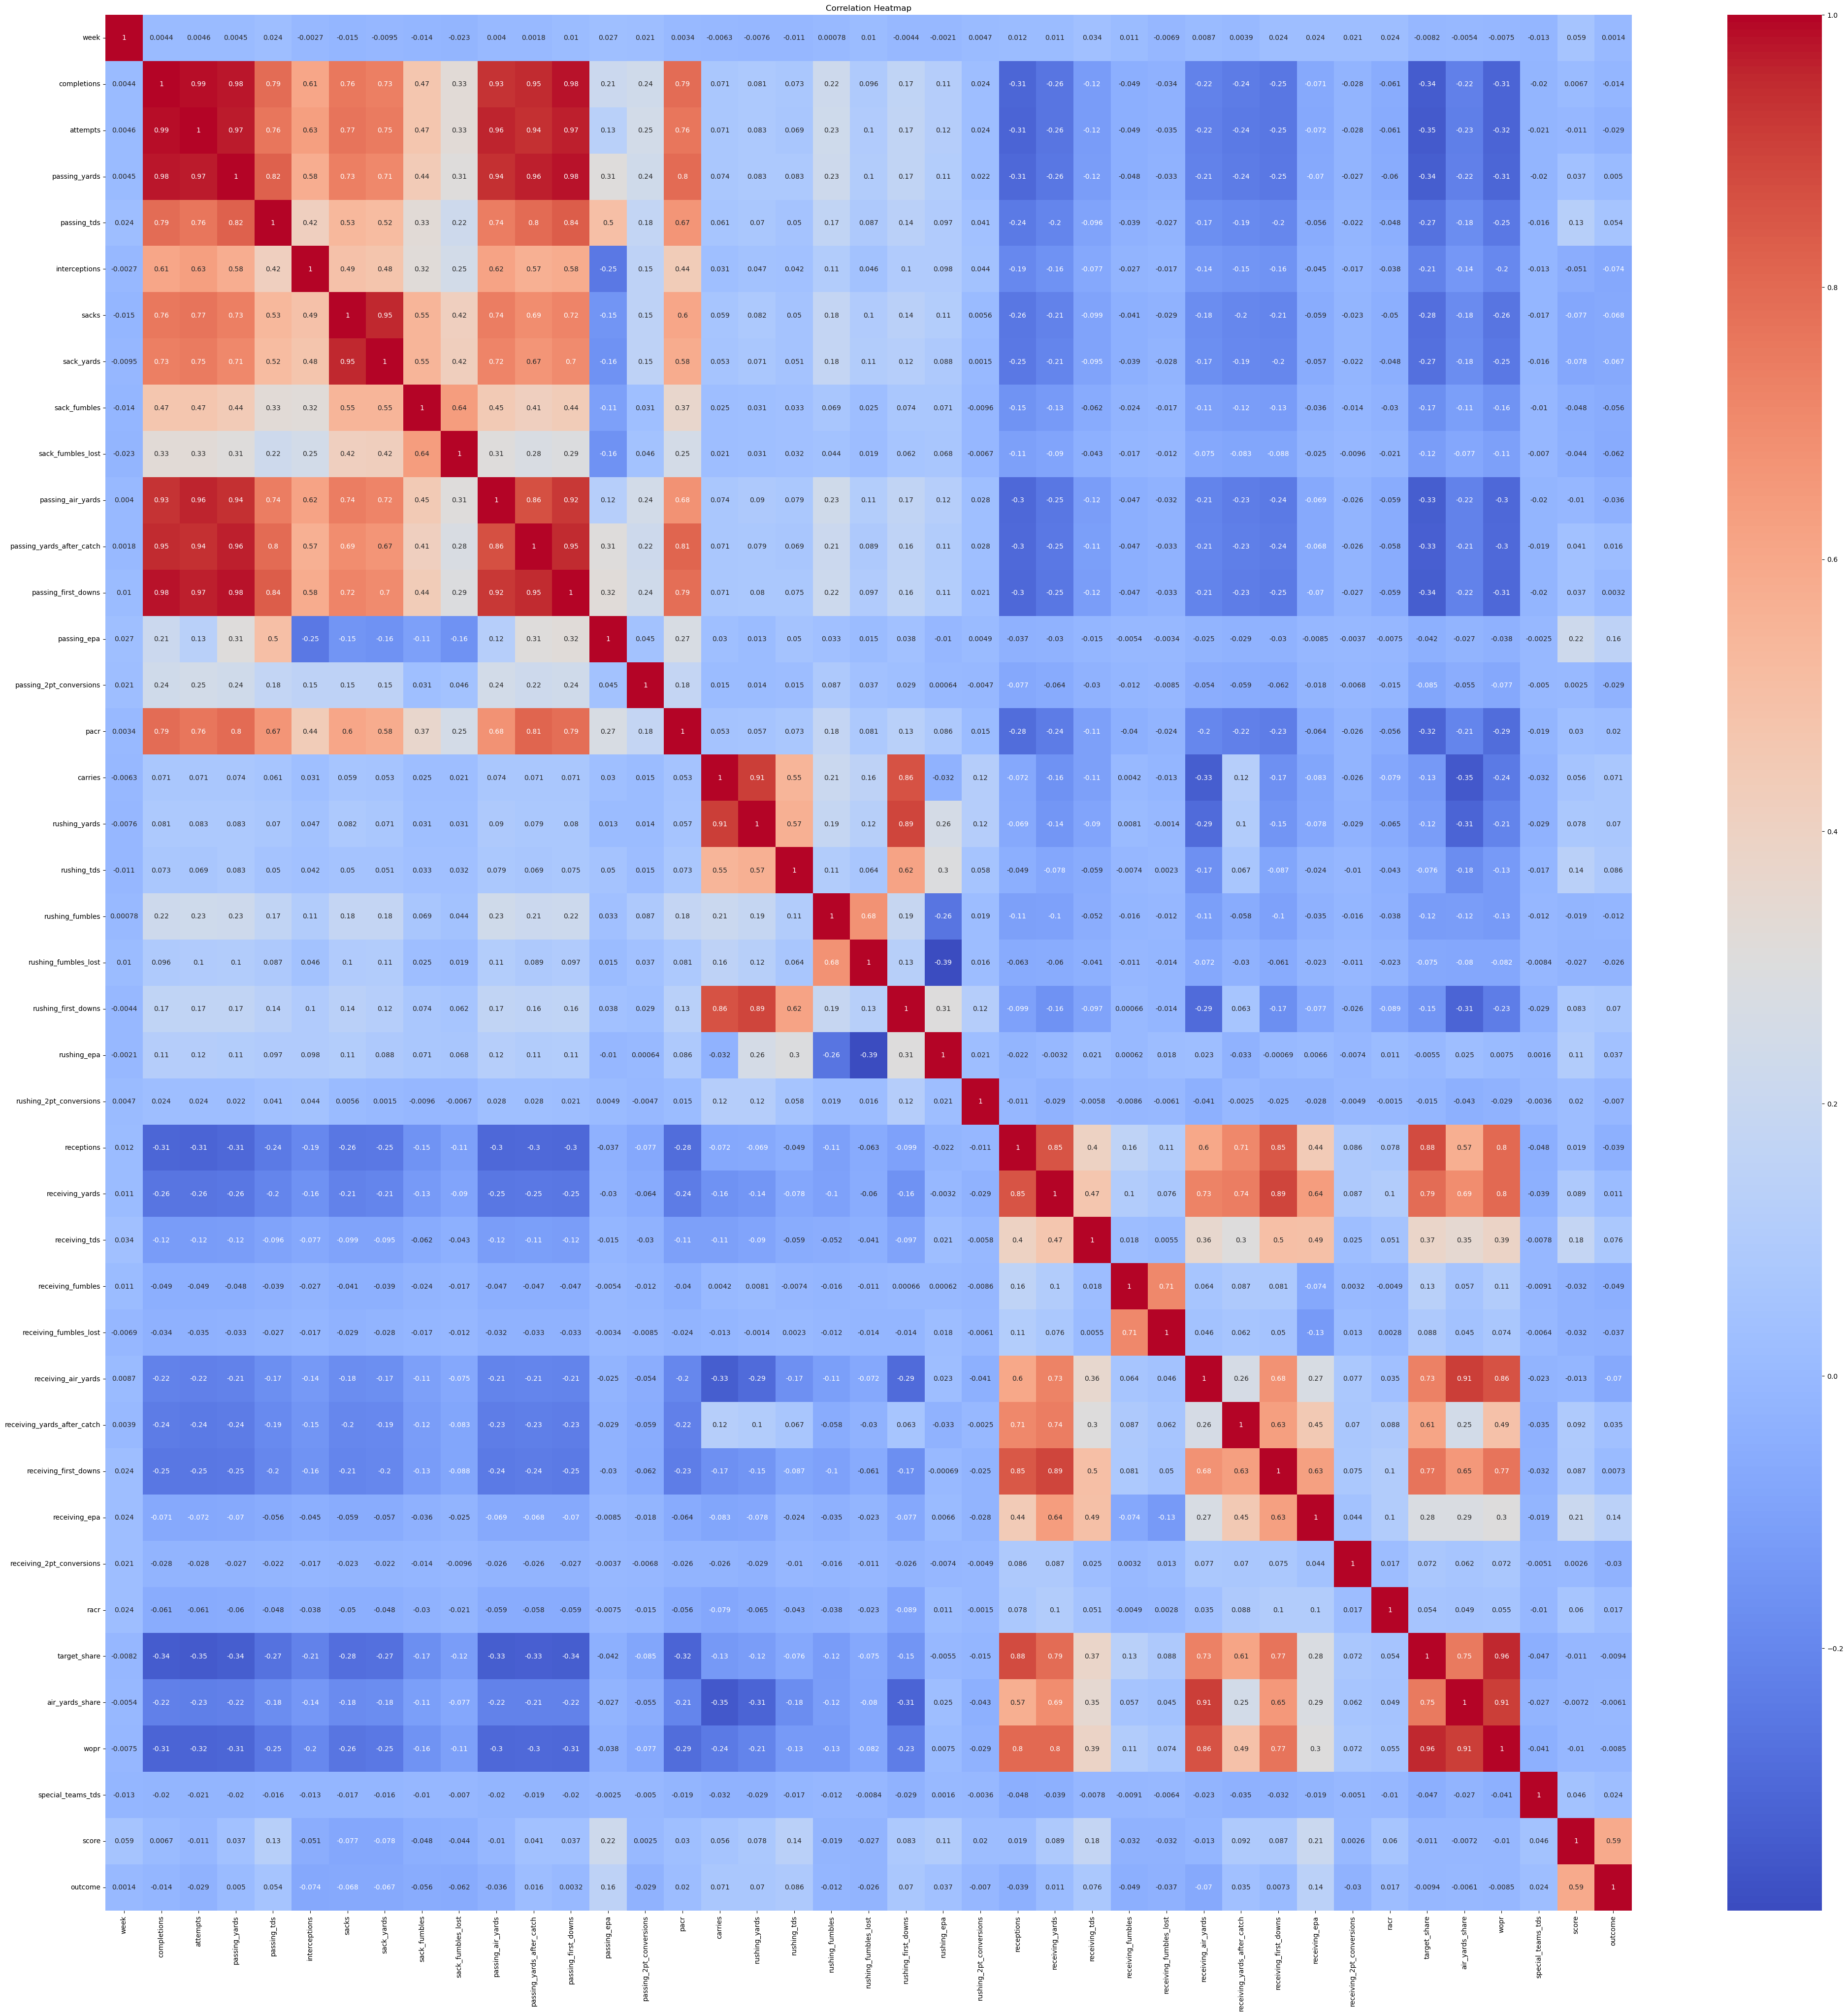

In [24]:
#Standardize formats
import numpy as np
numeric_cols = cleaned_df1.select_dtypes(include=[np.number]).columns
corr_matrix = cleaned_df1[numeric_cols].corr()
plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

From this plot, you can tell my observation through data preprocessing was correct

There are many features that have very strong correlations with each other

1. 
* Completions
* Attempts
* passing yards
* passing air yards
* passing yards after catch 
* passing first downs

2. 
* sacks
* sacks yards

3. 
* carries
* rushing yards
* rushing 1st downs

4. 
* rushing fumbles
* rushing fumbles yards

5. 
* target share
* air yards share
* wopr

6. 
* receptions
* receiving yards
* receiving 1st downs

7. 
* receving yards
* receiving air yards

8. 
* score 
* outcome


In [25]:
#Outlier detection - Identify potential outliers - Assess impact of outliers - Decide on treatment of outliers

from scipy import stats

def find_outliers_df(df):
    outlier_data = []  # List to store results
    
    for column in df.select_dtypes(include=[np.number]).columns:  # Loop through numerical columns
        z = np.abs(stats.zscore(df[column].dropna()))  # Calculate Z-score
        threshold = 3
        num_outliers = np.sum(z > threshold)  # Count outliers

        outlier_data.append({"Column": column, "Outliers Count": num_outliers})  # Append to list

    # Convert to DataFrame
    outlier_df = pd.DataFrame(outlier_data)
    
    return outlier_df  # Return the DataFrame

# Get outlier DataFrame and display it
outlier_df = find_outliers_df(cleaned_df1)
outlier_df



,Column,Outliers Count
0,week,0
1,completions,244
2,attempts,222
3,passing_yards,215
4,passing_tds,244
5,interceptions,94
6,sacks,225
7,sack_yards,178
8,sack_fumbles,158
9,sack_fumbles_lost,71


#### Bar Plot

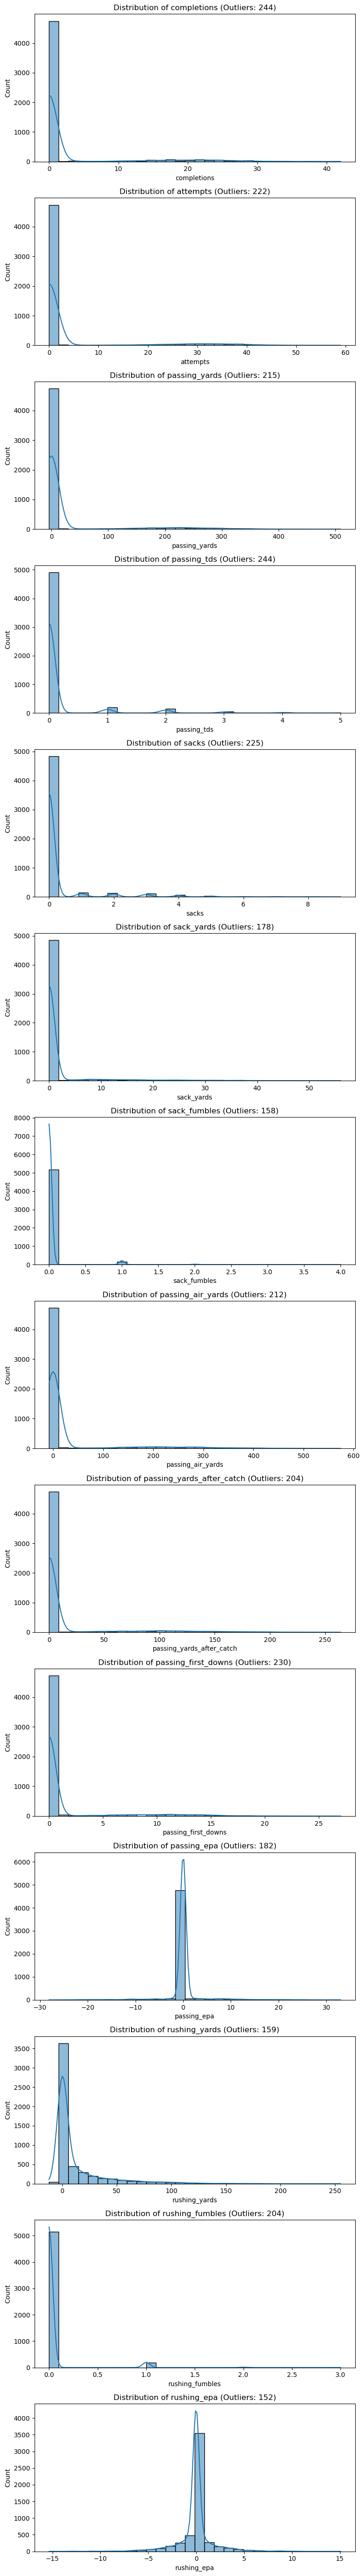

In [26]:
#If outliers if greater than 150, create a bar plot

# Function to plot only columns with more than 150 outliers
def plot_outliers(df, outlier_df):
    columns_to_plot = outlier_df[outlier_df["Outliers Count"] > 150]["Column"].tolist()

    if columns_to_plot:
        num_plots = len(columns_to_plot)
        fig, axes = plt.subplots(nrows=num_plots, figsize=(8, num_plots * 4))  # Dynamic sizing

        if num_plots == 1:
            axes = [axes]  # Ensure axes is iterable when there's only one plot

        for ax, col in zip(axes, columns_to_plot):
            sns.histplot(df[col], bins=30, kde=True, ax=ax)
            ax.set_title(f"Distribution of {col} (Outliers: {outlier_df[outlier_df['Column'] == col]['Outliers Count'].values[0]})")

        plt.tight_layout()
        plt.show()


plot_outliers(cleaned_df1, outlier_df)  # Generate subplots only for columns with >150 outliers


In [27]:
def stats_m(df):
    stats_data = []  # List to store stats for each column

    for column in df.select_dtypes(include=[np.number]).columns:  # Loop through numerical columns
        z = np.abs(stats.zscore(df[column].dropna()))  # Calculate Z-score
        
        # Compute statistics
        z_mean = np.mean(z)  # Mean Z-score
        column_mean = df[column].mean()  # Mean of the column

        # Append results to list
        stats_data.append({"Column": column, "Mean Z-score": round(z_mean, 2), "Mean Value": round(column_mean, 2)})

    # Convert results into a DataFrame
    stats_df = pd.DataFrame(stats_data)

    return stats_df  # Return the DataFrame

# Call the function and print the DataFrame
stats_df = stats_m(cleaned_df1)
stats_df


,Column,Mean Z-score,Mean Value
0,week,0.87,9.52
1,completions,0.59,2.18
2,attempts,0.59,3.34
3,passing_yards,0.58,23.79
4,passing_tds,0.48,0.15
5,interceptions,0.40,0.07
6,sacks,0.50,0.25
7,sack_yards,0.48,1.62
8,sack_fumbles,0.32,0.03
9,sack_fumbles_lost,0.23,0.01


#### Scatterplot

In [52]:
#Scatterplots of the strongest correlated features

import plotly.express as px

fig = px.scatter(cleaned_df1, x='rushing_yards', y='rushing_first_downs', color='carries')
#plt.title("Height vs. Weight Distribution Colored by General Health")
fig.update_layout(
    title="Relationship Between Rushing Yards and Rushing First Downs by Carries"
)
fig.show()

In [53]:

fig = px.scatter(cleaned_df1, x='receiving_yards', y='receiving_first_downs', color='receptions')
#plt.title("Height vs. Weight Distribution Colored by General Health")
fig.update_layout(
    title="Relationship Between Receiving Yards and Receiving First Downs by Receptions"
)
fig.show()


In [54]:

fig = px.scatter(cleaned_df1, x='target_share', y='air_yards_share', color='wopr')
#plt.title("Height vs. Weight Distribution Colored by General Health")
fig.update_layout(
    title="Relationship Between Target Share and Air Yards Share by WOPR"
)
fig.show()

#### Model Evalution: XgBoost
Checklist:
1. Selected features (29) were scaled prior to modeling. X 
    - Principal Component Analysis was executed for dimensionality reduction as well. X
2. Test-Train-Split: Split the data 30/70 to build each model on training data and use the test data for predictions. X
3. Compare test error vs training error to gage if the model overfits, underfits, or fits perfectly. 
4. Provide summary statistics from each model. 
    - summary statistics (summary(model1) in R) - tells which features were significant in the model, certain significant starts
        - training error vs. test error - to see if the model overfits or underfits
5. Generate accuracy, f1, recall, and precision scores from predictions against the test data. 
6. Compare! 

Note: 
* target - continuous
* win - binary

In [31]:
X = cleaned_df1.select_dtypes(include=[np.number]).drop(columns=['score', 'outcome'])

y_target = cleaned_df1['score']
y_outcome = cleaned_df1['outcome']

# Train-test split for both target types
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_target, test_size=0.3, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_outcome, test_size=0.3, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

X_train_clf_scaled = scaler.fit_transform(X_train_clf)
X_test_clf_scaled = scaler.transform(X_test_clf)

print(y_train_clf)

2677    0
1471    0
2355    1
2962    0
4809    0
       ..
3267    1
3982    0
5437    0
5478    0
908     0
Name: outcome, Length: 3738, dtype: int64


In [32]:
print(y_test_clf)

3559    1
2070    1
5592    1
4467    0
179     0
       ..
4866    1
518     0
4142    0
910     1
1068    1
Name: outcome, Length: 1602, dtype: int64


In [33]:
#3. Compare test error vs. training error 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Train the model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
train_preds = xgb_model.predict(X_train)
test_preds = xgb_model.predict(X_test)

# Calculate error (1 - accuracy)
train_error = 1 - accuracy_score(y_train, train_preds)
test_error = 1 - accuracy_score(y_test, test_preds)

print(f"Training Error: {train_error:.4f}")
print(f"Test Error: {test_error:.4f}")
#Test Error > Training Error = overfitting

Training Error: 0.0075
Test Error: 0.1891


In [34]:
print("Shape of X_train input to model:", X_train_scaled.shape)
print("Any NaNs?", np.isnan(X_train_scaled).any())
print("Any constant columns?", np.all(X_train_scaled == X_train_scaled[0], axis=0).any())

Shape of X_train input to model: (3738, 40)
Any NaNs? False
Any constant columns? False


In [35]:
print("Unique target values:", np.unique(y_train))
print("Any NaNs in target?", pd.isnull(y_train).any())


Unique target values: [0 1]
Any NaNs in target? False


In [36]:
print(y_train.value_counts())

1    1874
0    1864
Name: outcome, dtype: int64


In [37]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape after PCA:", X_train_pca.shape)


Shape of X_train: (3738, 40)
Shape of X_train_scaled: (3738, 40)
Shape after PCA: (3738, 2)


In [38]:
print("Unique values in y_train:", np.unique(y_train))
print("Value counts:\n", y_train.value_counts())


Unique values in y_train: [0 1]
Value counts:
 1    1874
0    1864
Name: outcome, dtype: int64


In [39]:
print("Number of PCA components used:", X_train_pca.shape[1])
print("Number of features (no PCA):", X_train_scaled.shape[1])


Number of PCA components used: 2
Number of features (no PCA): 40


In [40]:
import pandas as pd
import numpy as np

print("Any NaNs in X_train_scaled?", np.isnan(X_train_scaled).any())
print("Any columns with constant values?", pd.DataFrame(X_train_scaled).nunique().eq(1).sum())


Any NaNs in X_train_scaled? False
Any columns with constant values? 0


In [41]:
print("Original dataset shape:", cleaned_df1.shape)

Original dataset shape: (5340, 47)


In [42]:
cleaned_df1

,player_id,player_display_name,position,recent_team,week,opponent_team,completions,attempts,passing_yards,passing_tds,...,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr,special_teams_tds,score,outcome,_merge
0,00-0023459,Aaron Rodgers,QB,NYJ,1,SF,13,21,167.0,1,...,0.000000,0,0.000,0.000000,0.000000,0.000000,0.0,19.0,0,both
1,00-0023459,Aaron Rodgers,QB,NYJ,2,TEN,18,30,176.0,2,...,0.000000,0,0.000,0.000000,0.000000,0.000000,0.0,24.0,1,both
2,00-0023459,Aaron Rodgers,QB,NYJ,3,NE,27,35,281.0,2,...,0.000000,0,0.000,0.000000,0.000000,0.000000,0.0,24.0,1,both
3,00-0023459,Aaron Rodgers,QB,NYJ,4,DEN,24,42,225.0,0,...,0.000000,0,0.000,0.000000,0.000000,0.000000,0.0,9.0,0,both
4,00-0023459,Aaron Rodgers,QB,NYJ,5,MIN,29,54,244.0,2,...,0.000000,0,0.000,0.000000,0.000000,0.000000,0.0,17.0,0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,00-0039921,Trey Benson,RB,ARI,10,NYJ,0,0,0.0,0,...,1.987017,0,-3.125,0.083333,-0.072072,0.074550,0.0,31.0,1,both
5593,00-0039921,Trey Benson,RB,ARI,12,SEA,0,0,0.0,0,...,0.000000,0,0.000,0.000000,0.000000,0.000000,0.0,6.0,0,both
5594,00-0039921,Trey Benson,RB,ARI,13,MIN,0,0,0.0,0,...,0.000000,0,0.000,0.000000,0.000000,0.000000,0.0,22.0,0,both
5595,00-0039921,Trey Benson,RB,ARI,14,SEA,0,0,0.0,0,...,-0.144496,0,-0.800,0.026316,-0.031847,0.017181,0.0,18.0,0,both


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[20:15:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




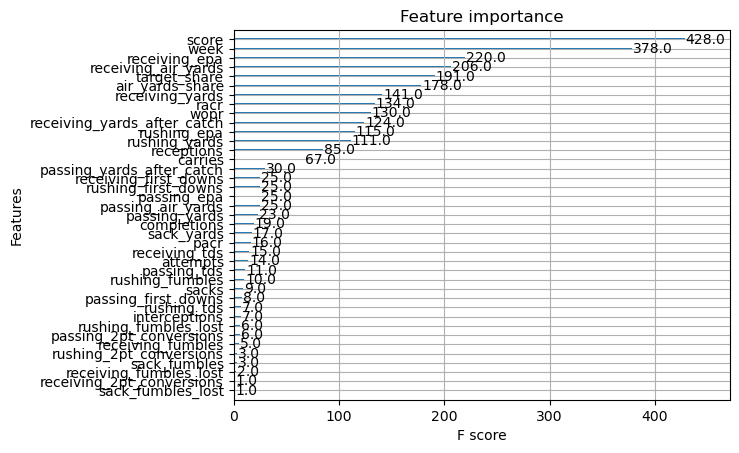

In [43]:
#Fix overfitting
xgb_model = XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    max_depth=3,              # limit tree depth (lower = less complexity)
    subsample=0.8,            # use only 80% of training data for each tree
    colsample_bytree=0.8,     # use only 80% of features per tree
    reg_alpha=1,              # L1 regularization (sparsity)
    reg_lambda=1              # L2 regularization (weight shrinkage)
)
xgb_model.fit(X_train_pca, y_train)

#4. Provide summary statistics from each model. 
from xgboost import plot_importance
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
plot_importance(xgb_model)
plt.show()

#Manually mapping these indices to names

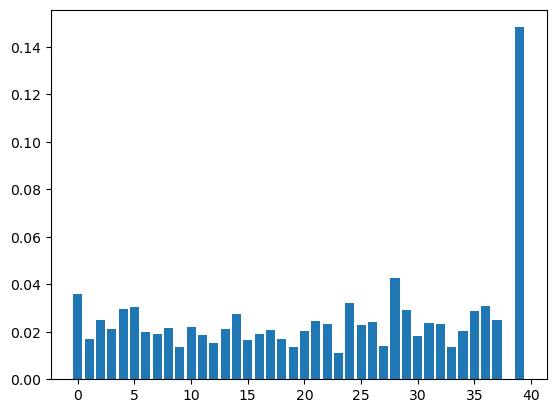

In [44]:
from matplotlib import pyplot
pyplot.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
pyplot.show()

In [45]:
#5.Generate accuracy, f1, recall, and precision scores from predictions against the test data

from numpy import sort
from sklearn.feature_selection import SelectFromModel

# make predictions for test data and evaluate -> baseline accuracy of your current model using all features
predictions = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold, creates a sorted list of importance thresholds (from least to most important)
thresholds = sort(xgb_model.feature_importances_)
for thresh in thresholds:
	# select features using threshold - selects features whose importance is greater than or equal to the threshold
	selection = SelectFromModel(xgb_model, threshold=thresh, prefit=True)
	#retrains a new XGBoost model using only those selected features
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model - evaluates this smaller model on the test data
	select_X_test = selection.transform(X_test)
	predictions = selection_model.predict(select_X_test)
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))



#Thresh=0.023, n=17, Accuracy: 83.40%
#Thresh=0.023, n=16, Accuracy: 83.46%
#Thresh=0.024, n=15, Accuracy: 84.46%
#Thresh=0.024, n=14, Accuracy: 83.46%
#Thresh=0.024, n=13, Accuracy: 83.83%
#Thresh=0.025, n=12, Accuracy: 84.02%
#Thresh=0.025, n=11, Accuracy: 84.14%

#The less amount of features the greater the accuracy until you get to n=10 
#Some of the smaller models may outperform the full model — meaning certain feature subsets are more predictive.

#Thresh=0.027, n=10, Accuracy: 83.52%
#Thresh=0.029, n=9, Accuracy: 85.39%
#Thresh=0.029, n=8, Accuracy: 84.71%
#Thresh=0.030, n=7, Accuracy: 83.83%
#Thresh=0.030, n=6, Accuracy: 83.96%
#Thresh=0.031, n=5, Accuracy: 83.77%
#Thresh=0.032, n=4, Accuracy: 84.83%
#Thresh=0.036, n=3, Accuracy: 87.20%

Accuracy: 81.09%
Thresh=0.000, n=40, Accuracy: 81.09%
Thresh=0.011, n=39, Accuracy: 81.09%


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning

Thresh=0.013, n=38, Accuracy: 82.15%
Thresh=0.014, n=37, Accuracy: 81.40%
Thresh=0.014, n=36, Accuracy: 81.40%


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names



Thresh=0.014, n=35, Accuracy: 80.90%
Thresh=0.015, n=34, Accuracy: 80.96%
Thresh=0.017, n=33, Accuracy: 81.84%


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names



Thresh=0.017, n=32, Accuracy: 81.52%
Thresh=0.017, n=31, Accuracy: 81.21%
Thresh=0.018, n=30, Accuracy: 81.21%


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names



Thresh=0.019, n=29, Accuracy: 82.27%
Thresh=0.019, n=28, Accuracy: 81.84%
Thresh=0.019, n=27, Accuracy: 82.33%


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning

Thresh=0.020, n=26, Accuracy: 81.65%
Thresh=0.020, n=25, Accuracy: 81.21%
Thresh=0.020, n=24, Accuracy: 81.71%
Thresh=0.021, n=23, Accuracy: 81.77%
Thresh=0.021, n=22, Accuracy: 82.52%
Thresh=0.021, n=21, Accuracy: 82.15%
Thresh=0.021, n=20, Accuracy: 82.33%


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning

Thresh=0.022, n=19, Accuracy: 82.27%
Thresh=0.023, n=18, Accuracy: 82.15%
Thresh=0.023, n=17, Accuracy: 83.40%
Thresh=0.023, n=16, Accuracy: 83.46%


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning

Thresh=0.024, n=15, Accuracy: 84.46%
Thresh=0.024, n=14, Accuracy: 83.46%
Thresh=0.024, n=13, Accuracy: 83.83%
Thresh=0.025, n=12, Accuracy: 84.02%


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning

Thresh=0.025, n=11, Accuracy: 84.14%
Thresh=0.027, n=10, Accuracy: 83.52%
Thresh=0.029, n=9, Accuracy: 85.39%
Thresh=0.029, n=8, Accuracy: 84.71%
Thresh=0.030, n=7, Accuracy: 83.83%
Thresh=0.030, n=6, Accuracy: 83.96%
Thresh=0.031, n=5, Accuracy: 83.77%
Thresh=0.032, n=4, Accuracy: 84.83%
Thresh=0.036, n=3, Accuracy: 87.20%
Thresh=0.042, n=2, Accuracy: 76.97%
Thresh=0.148, n=1, Accuracy: 76.97%


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning

In [51]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report

# Make predictions on test data
y_pred = xgb_model.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the results
print("XGBoost Model Evaluation Metrics:")
print(f"Accuracy:  {accuracy:.2f}")
print(f"F1 Score:  {f1:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"Precision: {precision:.2f}")

#Full Classification Report
print("\n📋 Full Classification Report:")
print(classification_report(y_test, y_pred))


XGBoost Model Evaluation Metrics:
Accuracy:  0.81
F1 Score:  0.81
Recall:    0.81
Precision: 0.82

📋 Full Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       782
           1       0.82      0.81      0.81       820

    accuracy                           0.81      1602
   macro avg       0.81      0.81      0.81      1602
weighted avg       0.81      0.81      0.81      1602



In [47]:
X = cleaned_df1.select_dtypes(include=[np.number]).drop(columns=['score', 'outcome'])

y_target = cleaned_df1['score']
y_outcome = cleaned_df1['outcome']

# Train-test split for both target types
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_target, test_size=0.3, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_outcome, test_size=0.3, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

X_train_clf_scaled = scaler.fit_transform(X_train_clf)
X_test_clf_scaled = scaler.transform(X_test_clf)

print(X_train_clf.columns)



Index(['week', 'completions', 'attempts', 'passing_yards', 'passing_tds',
       'interceptions', 'sacks', 'sack_yards', 'sack_fumbles',
       'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch',
       'passing_first_downs', 'passing_epa', 'passing_2pt_conversions', 'pacr',
       'carries', 'rushing_yards', 'rushing_tds', 'rushing_fumbles',
       'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_epa',
       'rushing_2pt_conversions', 'receptions', 'receiving_yards',
       'receiving_tds', 'receiving_fumbles', 'receiving_fumbles_lost',
       'receiving_air_yards', 'receiving_yards_after_catch',
       'receiving_first_downs', 'receiving_epa', 'receiving_2pt_conversions',
       'racr', 'target_share', 'air_yards_share', 'wopr', 'special_teams_tds'],
      dtype='object')


In [48]:
# next chunk

from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_reg_scaled, y_train_reg)

# Coefficients
coef = pd.Series(lasso.coef_, index=X.columns)
significant_features = coef[coef != 0]

print("Significant Features in LASSO:\n", significant_features.sort_values(ascending=False))

# Predictions
train_preds_reg = lasso.predict(X_train_reg_scaled)
test_preds_reg = lasso.predict(X_test_reg_scaled)

# Train/Test Error
train_error = mean_squared_error(y_train_reg, train_preds_reg)
test_error = mean_squared_error(y_test_reg, test_preds_reg)

print(f"\nLASSO Training MSE: {train_error:.4f}")
print(f"LASSO Test MSE: {test_error:.4f}")
print(f"R² score on test set: {r2_score(y_test_reg, test_preds_reg):.4f}")

Significant Features in LASSO:
 receiving_epa                  1.646931
passing_tds                    1.606100
passing_epa                    1.445790
rushing_tds                    1.302056
receiving_tds                  1.207005
rushing_epa                    0.706202
receiving_yards                0.655407
special_teams_tds              0.552045
receiving_yards_after_catch    0.435670
week                           0.427243
racr                           0.312292
interceptions                  0.184405
carries                        0.030683
rushing_2pt_conversions        0.023545
passing_yards_after_catch      0.010972
rushing_fumbles               -0.023909
air_yards_share               -0.028696
receiving_2pt_conversions     -0.053811
receiving_fumbles             -0.074460
pacr                          -0.101113
receiving_air_yards           -0.355589
sacks                         -0.436256
passing_air_yards             -0.641032
completions                   -0.789505
receptio

In [49]:
# next chunk
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

logreg = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
logreg.fit(X_train_clf_scaled, y_train_clf)

# Coefficient summary
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
})
print("\nLogistic Regression Coefficients:\n", coef_df.sort_values(by='Coefficient', ascending=False))

# Predictions
train_preds_clf = logreg.predict(X_train_clf_scaled)
test_preds_clf = logreg.predict(X_test_clf_scaled)

# Train/Test Error
train_error = 1 - accuracy_score(y_train_clf, train_preds_clf)
test_error = 1 - accuracy_score(y_test_clf, test_preds_clf)

print(f"\nLogistic Regression Training Error: {train_error:.4f}")
print(f"Logistic Regression Test Error: {test_error:.4f}")

# Metrics
acc = accuracy_score(y_test_clf, test_preds_clf)
f1 = f1_score(y_test_clf, test_preds_clf)
recall = recall_score(y_test_clf, test_preds_clf)
precision = precision_score(y_test_clf, test_preds_clf)

print(f"\nAccuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")


Logistic Regression Coefficients:
                         Feature  Coefficient
32                receiving_epa     0.530657
35                 target_share     0.486793
37                         wopr     0.429338
3                 passing_yards     0.400287
11    passing_yards_after_catch     0.333370
13                  passing_epa     0.287991
36              air_yards_share     0.284714
25              receiving_yards     0.183341
16                      carries     0.169336
7                    sack_yards     0.167744
4                   passing_tds     0.161356
18                  rushing_tds     0.148777
28       receiving_fumbles_lost     0.118343
22                  rushing_epa     0.087375
26                receiving_tds     0.063483
38            special_teams_tds     0.057221
34                         racr     0.030902
0                          week     0.009733
21          rushing_first_downs     0.002501
5                 interceptions    -0.012235
20         rushing_